# 数据挖掘流程

1、数据读取
--统计指标
--查看数据规模

2、数据探索（特征理解）
--单特征的分析，逐个变量分析对结果y的影响（x和y之间的相关性）
--多变量分析（x和x之间的相关性）

3、数据清洗和预处理
--缺失值填充
--特征标准化（异常值处理）、归一化（可去量纲,加速）
--特征工程（筛选有价值的特征）
--分析特征之间的相关性

4、建立模型
--特征数据和标签
--数据集的切分
--多种模型对比：交叉验证、调参（学习曲线、网格搜索）
--集成算法（提升算法）XGBoost、GBDT、light-GBM、神经网络（多种集成）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline      
'''直接出图 可省略plt.show()'''
import seaborn as sns  # 颜色丰富
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# 探索数据
# 统计标签 对当前列进行计数
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, '柱形图')

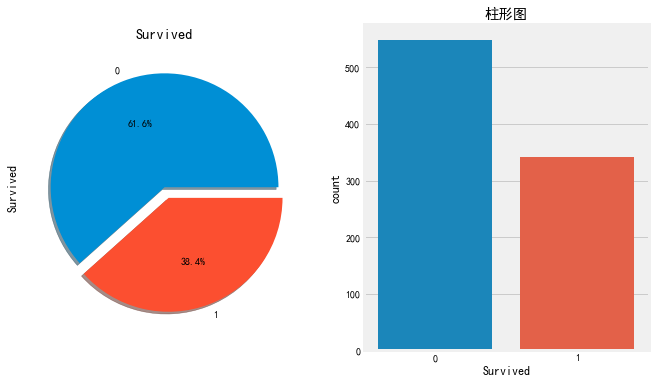

In [5]:
# 分类型数据  饼图、柱状图、条形图、直方图
#标签比例  获救情况
#解决中文乱码
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文字体
plt.rcParams['axes.unicode_minus'] = False #设定正常显示字符
f,ax=plt.subplots(1,2,figsize=(10,6))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')


#sns 中的直方图
sns.countplot('Survived',data=data,ax=ax[1])

ax[1].set_title('柱形图')

In [6]:
# 不同性别下存活的人数
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

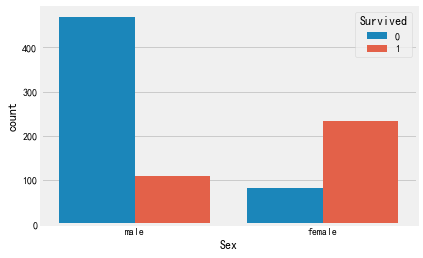

In [7]:
sns.countplot('Sex',hue='Survived',data=data)  #hue 对那一列计数

In [8]:
# Pclass和获救之间的关系
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='autumn_r')   #针对行列进行求和      #适用于分类型变量

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [9]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='autumn_r')


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


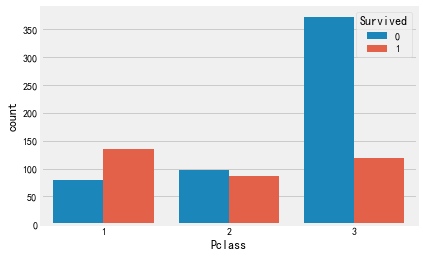

In [10]:
sns.countplot('Pclass',hue='Survived',data=data)

In [11]:
# 不同性别下船舱等级的获救情况
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='autumn_r')

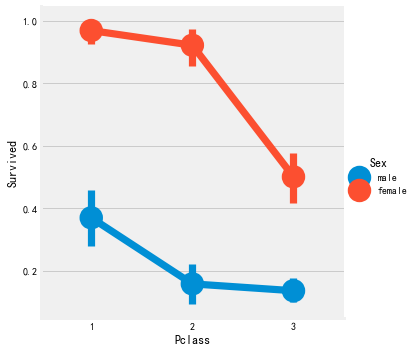

In [12]:
# 三维用二维图显现
# 分类型变量
sns.factorplot('Pclass','Survived',hue='Sex',data=data)  #hue='Sex'按此计算 

## 缺失值填充

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data['initial'] = data.Name.str.extract('([A-Za-z]+)\.')  #\.转译
data['initial'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: initial, dtype: object

In [15]:
pd.crosstab(data.initial,data.Sex).T  #称谓计数、转置

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
re=[]
for i in data.initial.values:
    if i != 'Master' and i!='Miss' and i!='Mr' and i!='Mrs':
        re.append(i.replace(i,'other'))
    else:
        re.append(i)


In [17]:
data['re']=re
data.re.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'other'], dtype=object)

In [18]:
data.groupby('re')['Sex'].count()

re
Master     40
Miss      182
Mr        517
Mrs       125
other      27
Name: Sex, dtype: int64

In [19]:
data.groupby('re')['Age'].mean()  #不同年龄下re中各个的均值

re
Master     4.574167
Miss      21.773973
Mr        32.368090
Mrs       35.898148
other     42.384615
Name: Age, dtype: float64

In [20]:
int(data.groupby('re')['Age'].mean()[0])

4

In [21]:
data.loc[data.re=='Master','Age']  # re=='Master'下的'Age'

7       2.00
16      2.00
50      7.00
59     11.00
63      4.00
65       NaN
78      0.83
125    12.00
159      NaN
164     1.00
165     9.00
171     4.00
176      NaN
182     9.00
183     1.00
193     3.00
261     3.00
278     7.00
305     0.92
340     2.00
348     3.00
386     1.00
407     3.00
445     4.00
480     9.00
489     9.00
549     8.00
709      NaN
751     6.00
755     0.67
787     8.00
788     1.00
802    11.00
803     0.42
819    10.00
824     2.00
827     1.00
831     0.83
850     4.00
869     4.00
Name: Age, dtype: float64

In [22]:
data.loc[(data.Age.isnull())&(data.re=='Master'),'Age']

65    NaN
159   NaN
176   NaN
709   NaN
Name: Age, dtype: float64

In [23]:
#mine
for  i in data.re.values:
    data.loc[(data.Age.isnull())&(data.re=='i'),'Age']=int(data.groupby('re')['Age'].mean()[i])

In [24]:
data.Age.isnull().sum()

177

In [25]:
for i in data.re.values:
    data.loc[(data.Age.isnull())&(data.re==i),'Age']=int(data.groupby('re')['Age'].mean()[i])


In [26]:
data.Age.isnull().sum()

0

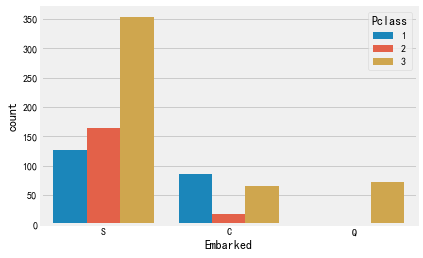

In [27]:
sns.countplot('Embarked',hue='Pclass',data=data)

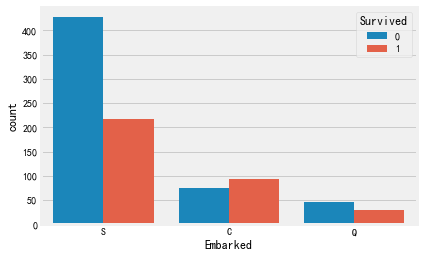

In [28]:
sns.countplot('Embarked',hue='Survived',data=data)

In [29]:
data['Embarked'].fillna('S',inplace=True)

In [30]:
data['Embarked'].isnull().any()  # 填补完成

False

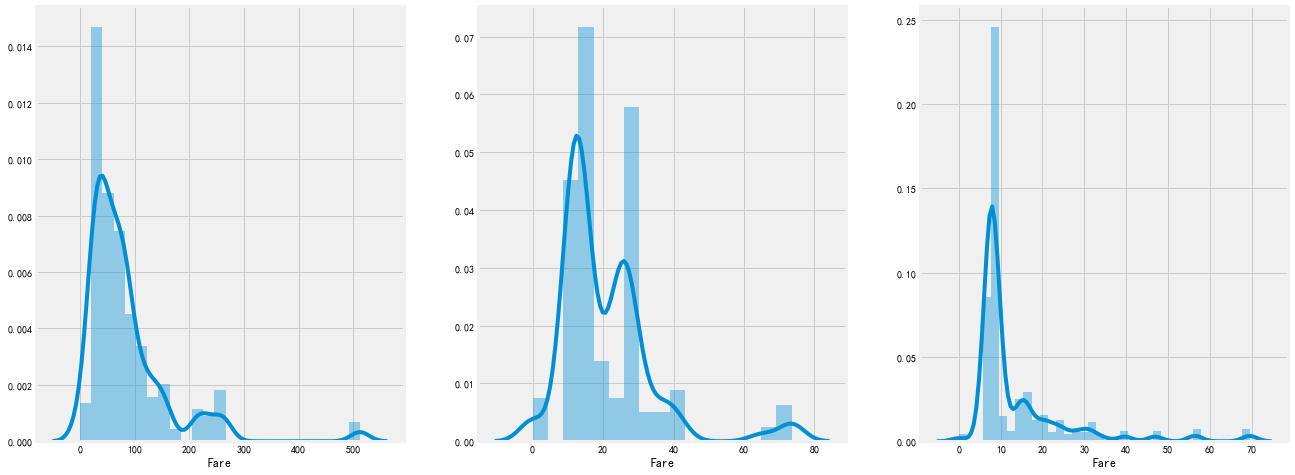

In [31]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])  # 经济舱

In [32]:
# 相关性热图
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.043358,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.089369,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.346011,0.083081,0.018443,-0.549500
Age,0.043358,-0.089369,-0.346011,1.000000,-0.268632,-0.195330,0.092215
SibSp,-0.057527,-0.035322,0.083081,-0.268632,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.195330,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.092215,0.159651,0.216225,1.000000


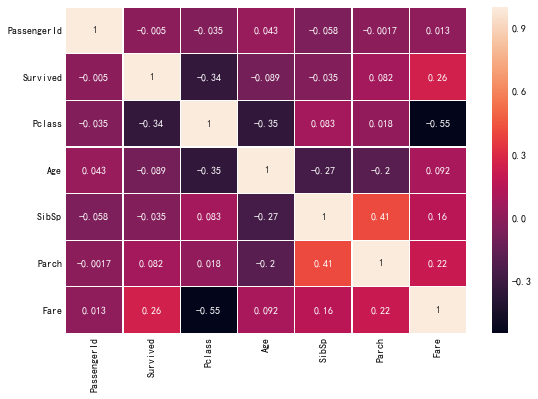

In [33]:
sns.heatmap(data.corr(),annot=True,linewidths=0.2)
fig=plt.gcf() # 后置画图的方法
fig.set_size_inches(8,6)  
plt.savefig('heatmap.png')  #保存图片

In [34]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=65),'Age_band']=3
data.loc[(data['Age']>65),'Age_band']=4

In [35]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,re,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,2


In [36]:
from sklearn import preprocessing

In [37]:
lbl=preprocessing.LabelEncoder()
data['Sex']=lbl.fit_transform(data['Sex'])
data['Embarked']=lbl.fit_transform(data['Embarked'])
data['re']=lbl.fit_transform(data['re'])

In [38]:
data['Embarked'].unique()

array([2, 0, 1], dtype=int64)

In [39]:
one_hot=preprocessing.OneHotEncoder(sparse=False) #编码  数字必须是数值型的
data['Embarked']=one_hot.fit_transform(data[['Embarked']])  #必须是二维的数组

In [40]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,re,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,Mr,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,Mrs,3,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,Mrs,3,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,Mr,2,2


In [41]:
data.drop(['PassengerId','Name','Age','Sex','Ticket','Cabin','initial'],axis=1)

,Survived,Pclass,SibSp,Parch,Fare,Embarked,re,Age_band
0,0,3,1,0,7.2500,0.0,2,1
1,1,1,1,0,71.2833,1.0,3,2
2,1,3,0,0,7.9250,0.0,1,1
3,1,1,1,0,53.1000,0.0,3,2
4,0,3,0,0,8.0500,0.0,2,2
5,0,3,0,0,8.4583,0.0,2,1
6,0,1,0,0,51.8625,0.0,2,3
7,0,3,3,1,21.0750,0.0,0,0
8,1,3,0,2,11.1333,0.0,3,1
9,1,2,1,0,30.0708,1.0,3,0


In [42]:
data.drop(['PassengerId','Name','Age','Sex','Ticket','Cabin','initial'],axis=1,inplace=True)

In [43]:
data.head()

,Survived,Pclass,SibSp,Parch,Fare,Embarked,re,Age_band
0,0,3,1,0,7.2500,0.0,2,1
1,1,1,1,0,71.2833,1.0,3,2
2,1,3,0,0,7.9250,0.0,1,1
3,1,1,1,0,53.1000,0.0,3,2
4,0,3,0,0,8.0500,0.0,2,2


In [44]:
# 整理好的数据可以保存成csv格式
data.to_csv('temp1.csv',index=False)

In [45]:
#excel 格式
data.to_excel('temp1.xlsx',index=False)

# 建模

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,LinearRegression

In [47]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import cross_val_score


In [48]:
X = data.iloc[:,data.columns!='Survived']
y = data.iloc[:,data.columns=='Survived']


In [49]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,random_state=10)

In [50]:
# logistic
l=LogisticRegression()
l.fit(Xtrain,Ytrain)
l.score(Xtest,Ytest)

0.7430167597765364

In [51]:
pred_1 = l.predict(Xtest)
metrics.accuracy_score(Ytest,pred_1)


0.7430167597765364

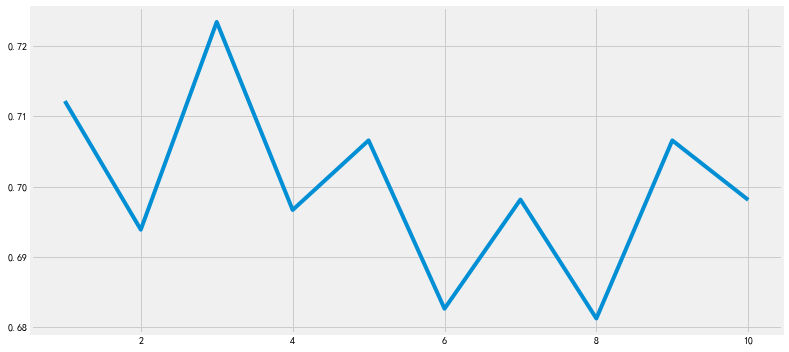

In [52]:
#KNN
score=[]
for i in list(range(1,11)):
    KNN=KNeighborsClassifier(n_neighbors=i)
    CVS=cross_val_score(KNN,Xtrain,Ytrain,cv=5)  #提高模型的稳定性
    score.append(CVS.mean())
    
plt.plot([*range(1,11)],score)
fig = plt.gcf()
fig.set_size_inches(12,6)
   


In [53]:
max(score)

0.7233724022456417

In [54]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(Xtrain,Ytrain)
KNN.score(Xtest,Ytest)


0.7262569832402235

## 决策树的网格搜索

In [56]:
from sklearn.model_selection import GridSearchCV

In [58]:
# 1设置可选参数
param_grid={'criterion':['entropy','gini'],
           'max_depth':range(2,10),
           'min_samples_leaf':range(1,10),
           'min_samples_split':range(2,10)}
#2 设置网格
GR=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
#3 建模
GR.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': range(2, 10), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
#输出接口
GR.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 7,
 'min_samples_split': 3}

In [60]:
GR.best_score_

0.8188202247191011

In [65]:
DTC=DecisionTreeClassifier(criterion='entropy',max_depth=4,
                           min_samples_leaf=7,min_samples_split=3).fit(Xtrain,Ytrain)
DTC.score(Xtest,Ytest)

0.8491620111731844

In [69]:
DTC.feature_importances_

array([0.08121599, 0.13263574, 0.        , 0.32356449, 0.00900984,
       0.44340116, 0.01017279])

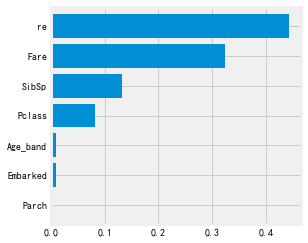

In [67]:
f = plt.figure(figsize=(4,4))
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=8,
                            min_samples_leaf=5,
                             min_samples_split=4).fit(Xtrain,Ytrain)

pd.Series(DTC.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)
 #筛选特征 （特征多时）

## ROC曲线

In [70]:
y_pred=DTC.predict(Xtest)

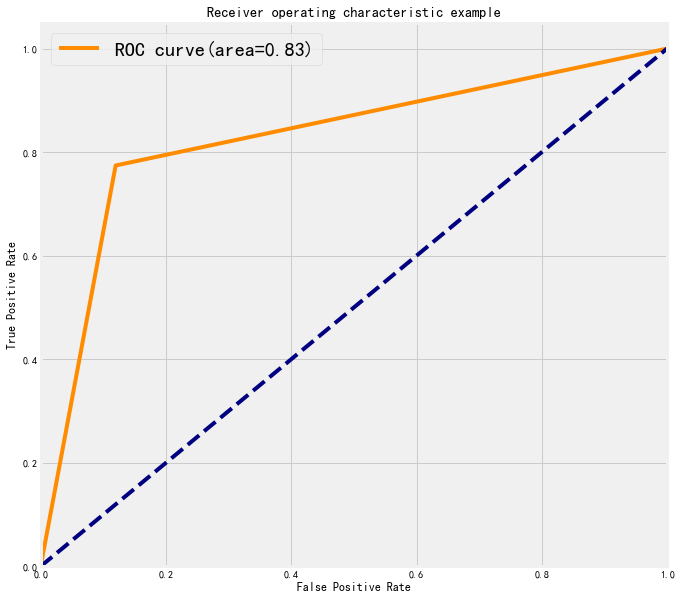

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_curve,auc # 计算roc和auc

# 计算真正率和假正率
# 真正率 假证率 预测值
fpr,tpr,th=roc_curve(Ytest,y_pred)
roc_auc=auc(fpr,tpr)  


#画图
plt.figure(figsize=(10,10))
#假证率是横坐标 真正率是纵坐标
plt.plot(fpr,tpr,color='darkorange',label='ROC curve(area=%0.2f)'% roc_auc)  

plt.plot([0,2],[0,2],color='navy',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='upper left',fontsize=20)

## 混淆矩阵

In [84]:
from  sklearn.model_selection import cross_val_predict

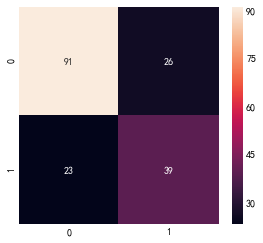

In [85]:
plt.figure(figsize=(4,4))


KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(Xtrain,Ytrain)
y_pred=KNN.predict(Xtest)
sns.heatmap(confusion_matrix(Ytest,y_pred),annot=True,fmt='2.0f')

混淆矩阵的报错问题纠正一下：这里由于我们使用混淆矩阵对真实值和预测值进行对比，所以此时真实值是Ytest，预测值应该是对测试集的预测。所以在cross_val_predict中我们的数据应该传入Xtest,Ytest，才能保证数据维度是正确的的~


# 集成算法

In [86]:
from sklearn.ensemble import BaggingClassifier

In [88]:
model=BaggingClassifier(base_estimator=DTC,n_estimators=700,random_state=0)
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

0.8547486033519553